# Training neural networks and behaviour of single neurons

Let's train a simple neural net to learn $f(x)=x$ in $[0,1]$ interval.
Importing relevant libraries:

In [1]:
import neural_net
import matplotlib.pyplot as plt

The function $f(x)=x$ is defined in data. Change data.fn if you want to experiment with other functions. Remember that the output of the function has to be restricted in $[0,1]$. 
choose a very simple neural net with 1 input, 5 neurons in the hidden layer and 1 output.
Training data is 100 samples from f fucntion. Validation and test data are 500 uniform samples from f function.

In [2]:
f = neural_net.Fn(0,1, lambda s: s)

For comparsion, we train 2 neural networks with the same data, and train one to a higher accuracy. This let us observe what features change when we move from a network with low accuracy to the one with higher accuracy.

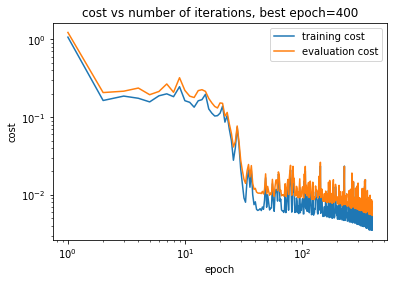

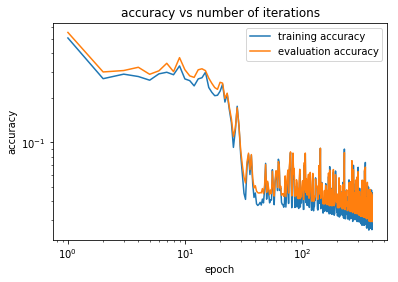

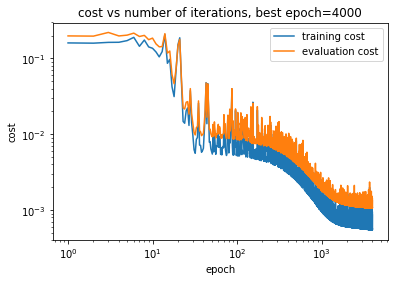

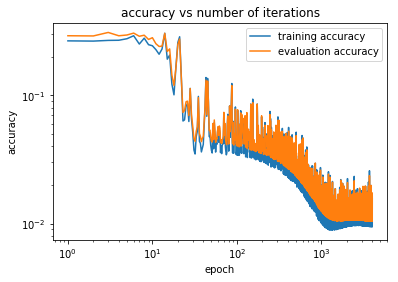

In [3]:
size = [1,5,1]
training, validation, test = neural_net.load_data(100,500,500, f)

net_low_res = neural_net.Network(size, Fn=f)
net_high_res = neural_net.Network(size, Fn=f)

eta = 3.0
batch_size = 30

net_low_res.SGD(training, batch_size, eta, epochs=400, mu=0.0, 
         variable_learning=False, evaluation_data=validation)
net_high_res.SGD(training, batch_size, eta, epochs=4000, mu=0.0, 
         variable_learning=False, evaluation_data=validation)

Accuracy (mean squared error) of the neural nets after being trained:
[to get max error set flag="Max" in net.accuracy]

In [4]:
print("low resolution net mean squared error test: %.4f" % net_low_res.accuracy(test),
      "training:%.4f" % net_low_res.accuracy(training))
print("high resolution net mean squared error test: %.4f" % net_high_res.accuracy(test),
      "training:%.4f" % net_high_res.accuracy(training))
print("low resolution net max error test: %.3f" % net_low_res.accuracy(test, flag="Max"),
      "training:%.3f" % net_low_res.accuracy(training, flag="Max"))
print("high resolution net max error test: %.3f" % net_high_res.accuracy(test, flag="Max"),
      "training:%.3f" % net_high_res.accuracy(training, flag ="Max"))

low resolution net mean squared error test: 0.0440 training:0.0457
high resolution net mean squared error test: 0.0160 training:0.0156
low resolution net max error test: 0.093 training:0.089
high resolution net max error test: 0.029 training:0.025


What the neural nets predict vs the function itself:

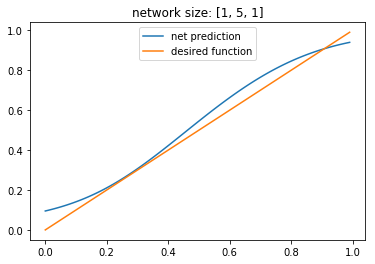

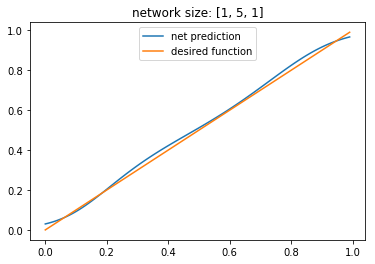

In [5]:
net_low_res.plot()
net_high_res.plot()

Now, let's see how individual neurons in net1 behave. Each row shows the input to each neuron in a layer and its output (which is simply the action of sigmoid). 

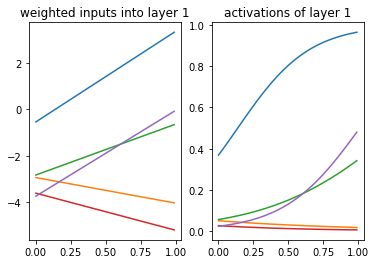

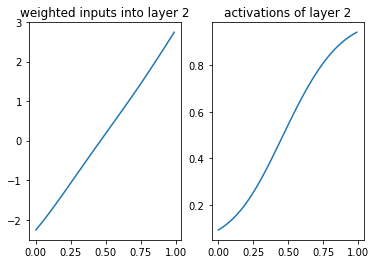

In [6]:
net_low_res.plot_hidden()

Compare the above plots to the one for net2. In the activation of layer2, you can clearly see how neurons are adjusting themselves to produce the output correctly.
Note: colors in these plots do not necessarily correspond to the same colors above. 

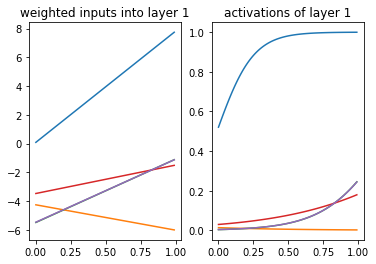

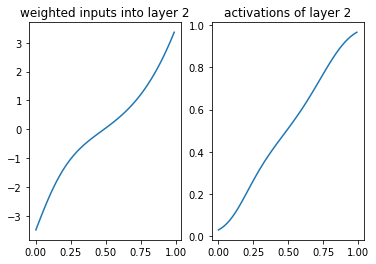

In [7]:
net_high_res.plot_hidden()

# Accuracy vs number of training data

Let's see how the accuracy of neural nets scales with the number of training data. Here, we consider two networks, trained by 100 and 10 training data sizes.

Epoch 18680 training complete. learning_halve = 3
Epoch 36472 training complete. learning_halve = 3
Epoch 53184 training complete. learning_halve = 3
Epoch 71226 training complete. learning_halve = 2
Epoch 87766 training complete. learning_halve = 2
Epoch 105745 training complete. learning_halve = 2
Epoch 124731 training complete. learning_halve = 2
Epoch 143690 training complete. learning_halve = 1
Epoch 162536 training complete. learning_halve = 1
Epoch 181689 training complete. learning_halve = 1
Epoch 200696 training complete. learning_halve = 1
Epoch 219797 training complete. learning_halve = 1
Epoch 238827 training complete. learning_halve = 1
Epoch 257881 training complete. learning_halve = 1
Epoch 276926 training complete. learning_halve = 1
Epoch 295793 training complete. learning_halve = 1
Epoch 314915 training complete. learning_halve = 1
Epoch 333821 training complete. learning_halve = 1
Epoch 352831 training complete. learning_halve = 1
Epoch 371907 training complete. lear

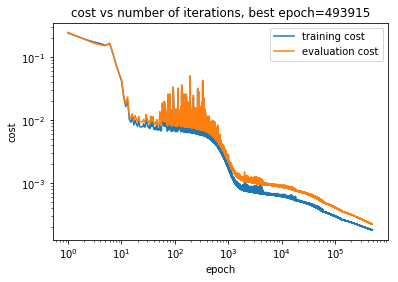

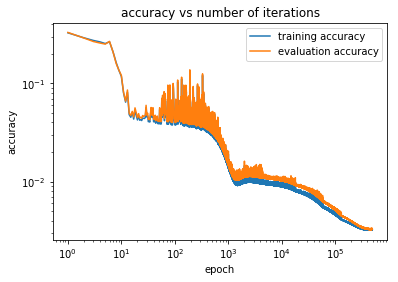

In [8]:
size = [1, 5, 1]
training1, validation1, test1 = neural_net.load_data(100,500,500, f)
training2, validation2, test2 = neural_net.load_data(500,500,500, f)

net_low_training = neural_net.Network(size, Fn=f)
net_high_training = neural_net.Network(size, Fn=f)

variable_learning = True
eta = 3.0
batch_size = 20
net_low_training.SGD(training1, batch_size, eta, mu=0.0, 
         variable_learning=variable_learning, no_improvement_size=50, learning_halve=5,
        evaluation_data=validation1)

Epoch 5402 training complete. learning_halve = 4
Epoch 10898 training complete. learning_halve = 4
Epoch 16417 training complete. learning_halve = 3
Epoch 21781 training complete. learning_halve = 3
Epoch 27894 training complete. learning_halve = 2
Epoch 33660 training complete. learning_halve = 2
Epoch 39527 training complete. learning_halve = 2


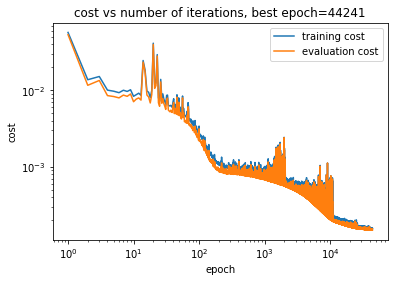

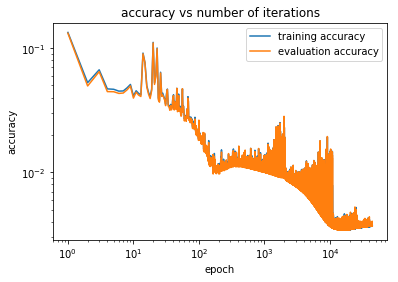

In [9]:
net_high_training.SGD(training2, batch_size, eta, mu=0.0,
         variable_learning=variable_learning, no_improvement_size=50, learning_halve=5,
         evaluation_data=validation2)

low training net mean squared error test: 0.0032 training:0.0032
high training net mean squared error test: 0.0038 training:0.0037
low training net max error test: 0.013 training:0.014
high training net max error test: 0.011 training:0.011


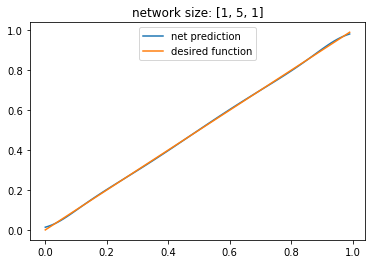

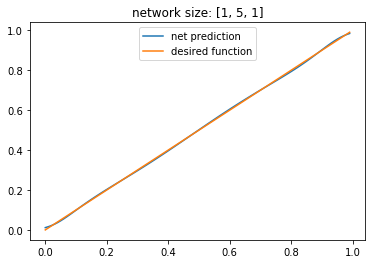

In [10]:
net_low_training.plot()
net_high_training.plot()
print("low training net mean squared error test: %.4f" % net_low_training.accuracy(test1),
      "training:%.4f" % net_low_training.accuracy(training1))
print("high training net mean squared error test: %.4f" % net_high_training.accuracy(test2), 
      "training:%.4f" % net_high_training.accuracy(training2))
print("low training net max error test: %.3f" % net_low_training.accuracy(test1, flag="Max"),
      "training:%.3f" % net_low_training.accuracy(training1, flag="Max"))
print("high training net max error test: %.3f" % net_high_training.accuracy(test2, flag="Max"),
      "training:%.3f" % net_high_training.accuracy(training2, flag ="Max"))

# Neural net with Exponential output 

Let's compare two networks which differ by their outout neuron. net1 is all sigmoid activation, but net2 has an exponential activation for output. We different cost function for net2 to avoid slow down of output neuron learning.

Epoch 18116 training complete. learning_halve = 4
Epoch 35483 training complete. learning_halve = 3
Epoch 53109 training complete. learning_halve = 2
Epoch 69732 training complete. learning_halve = 2
Epoch 87799 training complete. learning_halve = 2
Epoch 106380 training complete. learning_halve = 2
Epoch 124065 training complete. learning_halve = 2
Epoch 141350 training complete. learning_halve = 2
Epoch 158897 training complete. learning_halve = 2
Epoch 176248 training complete. learning_halve = 2
Epoch 188731 training complete. learning_halve = 2
Epoch 205017 training complete. learning_halve = 2
Epoch 218977 training complete. learning_halve = 2
Epoch 234294 training complete. learning_halve = 2
Epoch 251401 training complete. learning_halve = 1
Epoch 270094 training complete. learning_halve = 1
Epoch 287995 training complete. learning_halve = 1
Epoch 303765 training complete. learning_halve = 1
Epoch 318189 training complete. learning_halve = 1
Epoch 332408 training complete. lear

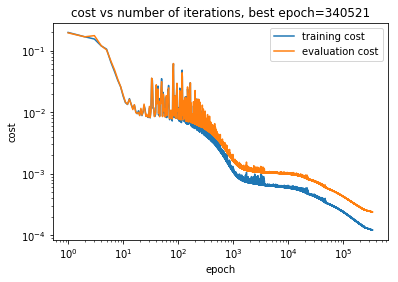

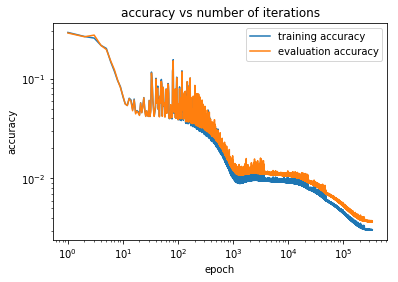

In [11]:
size = [1, 5, 1]
training, validation, test = neural_net.load_data(100,500,500, f)


net_sigmoid = neural_net.Network(size, Fn=f)
activation_type = ["Sigmoid", "Exponential"]
net_exp = neural_net.Network(size, activations=activation_type, Fn=f, cost=neural_net.ExponentialCost)

variable_learning = True
eta = 3.0
batch_size = 20

net_sigmoid.SGD(training, batch_size, eta, mu=0.0, 
        variable_learning=variable_learning, no_improvement_size=50, learning_halve=5,
        evaluation_data=validation)

Epoch 18641 training complete. learning_halve = 4
Epoch 37142 training complete. learning_halve = 4
Epoch 55684 training complete. learning_halve = 3
Epoch 74447 training complete. learning_halve = 3
Epoch 93207 training complete. learning_halve = 2
Epoch 111816 training complete. learning_halve = 2
Epoch 130417 training complete. learning_halve = 2
Epoch 148150 training complete. learning_halve = 2
Epoch 165925 training complete. learning_halve = 2
Epoch 185000 training complete. learning_halve = 2
Epoch 203580 training complete. learning_halve = 2
Epoch 222473 training complete. learning_halve = 2
Epoch 240083 training complete. learning_halve = 2
Epoch 259558 training complete. learning_halve = 2
Epoch 277015 training complete. learning_halve = 2
Epoch 296354 training complete. learning_halve = 2
Epoch 311795 training complete. learning_halve = 2
Epoch 330947 training complete. learning_halve = 2
Epoch 349868 training complete. learning_halve = 2
Epoch 369783 training complete. lear

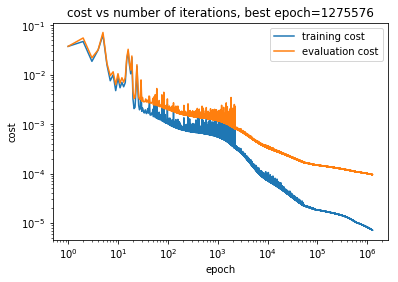

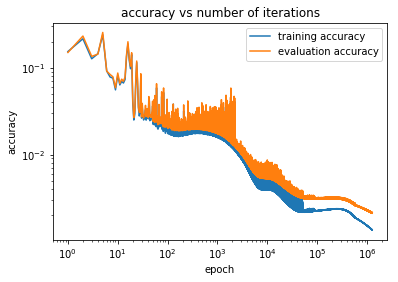

In [12]:
net_exp.SGD(training, batch_size, eta, mu=0.0, 
        variable_learning=variable_learning, no_improvement_size=50, learning_halve=5,
        evaluation_data=validation)

sigmoid net mean squared error test: 0.0036 training:0.0030
exponential net mean squared error test: 0.0018 training:0.0013
sigmoid net max error test: 0.012 training:0.010
exponential net max error test: 0.011 training:0.003


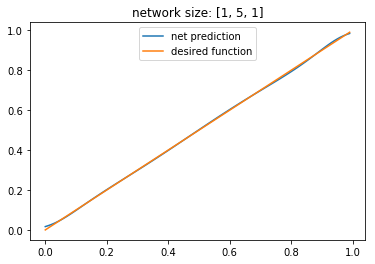

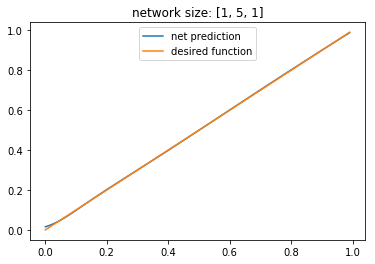

In [13]:
net_sigmoid.plot()
net_exp.plot()
print("sigmoid net mean squared error test: %.4f" % net_sigmoid.accuracy(test),
      "training:%.4f" % net_sigmoid.accuracy(training))
print("exponential net mean squared error test: %.4f" % net_exp.accuracy(test), 
      "training:%.4f" % net_exp.accuracy(training))
print("sigmoid net max error test: %.3f" % net_sigmoid.accuracy(test, flag="Max"),
      "training:%.3f" % net_sigmoid.accuracy(training, flag="Max"))
print("exponential net max error test: %.3f" % net_exp.accuracy(test, flag="Max"),
      "training:%.3f" % net_exp.accuracy(training, flag ="Max"))

# to discuss:
- max error vs mean squared error
- effect of higher training data size
- why we could've expected payoff approximation to work based on linear function results
